# Child & Infant Mortality
_____________________________________________________________________________________________________________________
One in every 100 children dies before completing one year of life. Around 68 percent of infant mortality is attributed to deaths of children before completing 1 month.
15,000 children die every day – Child mortality is an everyday tragedy of enormous scale that rarely makes the headlines
Child mortality rates have declined in all world regions, but the world is not on track to reach the Sustainable Development Goal for child mortality
Before the Modern Revolution child mortality was very high in all societies that we have knowledge of – a quarter of all children died in the first year of life, almost half died before reaching the end of puberty
Over the last two centuries all countries in the world have made very rapid progress against child mortality. From 1800 to 1950 global mortality has halved from around 43% to 22.5%. Since 1950 the mortality rate has declined five-fold to 4.5% in 2015. All countries in the world have benefitted from this progress
_____________________________________________________________________________________________________________________
#### Participants 

- Colchado Avalos Jorge
- Duran Carrasco Uriel
- Meraz Olivas Jhoel Francisco
- Mora Campos Carlos Eduardo
- Santacruz Espino Rodrigo

## Import Libraries

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import trim_mean

from statsmodels import robust
import wquantiles

%matplotlib inline
sns.set()
from pathlib import Path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 52.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Initializing Datasets

In [ ]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'Datasets'

CHILDREN_DEAD = DATA / 'Children-woman-death-vs-survival.csv'
CAUSES_OF_DEAD = DATA / 'causes-of-death-in-children.csv'
DEATHS_BY_AGE = DATA / 'child-deaths-by-age.csv'
CHILD_MORTALITY_BY_AGE = DATA / 'child-mortality-by-sex.csv'

In [ ]:
df_children_dead = pd.read_csv(CHILDREN_DEAD)
df_causes_of_dead = pd.read_csv(CAUSES_OF_DEAD)
df_deaths_by_age = pd.read_csv(DEATHS_BY_AGE)

In [ ]:
print("df_children_dead: ", df_children_dead.shape)
print("df_deaths_by_age: ", df_deaths_by_age.shape)
print("df_causes_of_dead: ", df_causes_of_dead.shape)

In [ ]:
df_causes_age = df_deaths_by_age.merge(df_causes_of_dead, how='inner')

## Measures of central tendency
- Mean
- Trimmed Mean
- Median
- Mode

In [ ]:
print("Mean of Children that died before 5 years of age per woman: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mean())
print("Trimmed Mean of Children that died before 5 years of age per woman: ", trim_mean(df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'], 0.1))
print("Median of Children that died before 5 years of age per woman: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].median())
print("Mode of Children that died before 5 years of age per woman: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mode()[0])

Mean of Children that died before 5 years of age per woman:  0.6017311377048156
Trimmed Mean of Children that died before 5 years of age per woman:  0.5012645857494625
Median of Children that died before 5 years of age per woman:  0.339934
Mode of Children that died before 5 years of age per woman:  0.003528


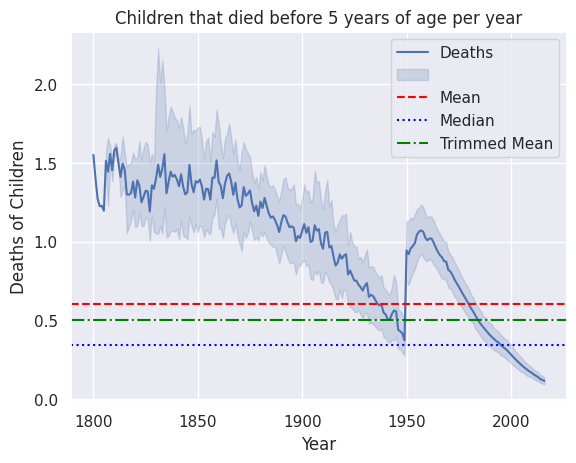

In [ ]:
sns.lineplot(data=df_children_dead, x='Year', y='Children that died before 5 years of age per woman (based on Gapminder (2017))')
plt.ylabel('Deaths of Children')
plt.title('Children that died before 5 years of age per year')
plt.axhline(
    df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mean(),
    color="red",
    linestyle="--",
    label='Mean'
)
plt.axhline(
    df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].median(),
    color='blue',
    linestyle=":",
    label='Median'
)
plt.axhline(
    trim_mean(df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'],0.1),
    color='green',
    linestyle="-.",
    label='Trimmed Mean'
)
labels = ['Deaths', '', 'Mean', 'Median', 'Trimmed Mean']

plt.legend(labels)


In [ ]:
print("Stardard Deviation: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].std())
print("Variance: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].var())
print("Range: ", \
df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].max() - df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].min()
)
print("Mean Deviation: ", df_children_dead['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mad())

Stardard Deviation:  0.6481450563544375
Variance:  0.42009201407669694
Range:  3.4278958
Mean Deviation:  0.5348846408768809


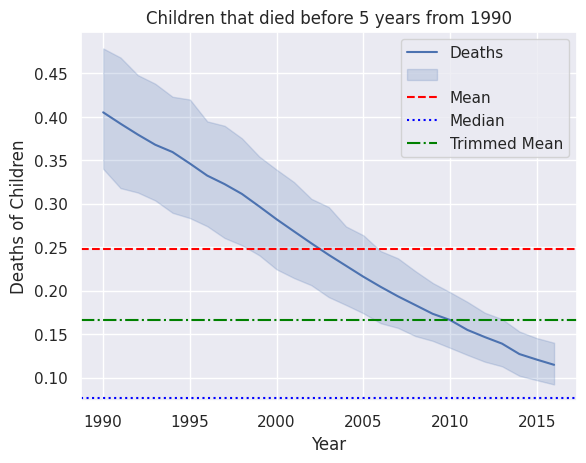

In [ ]:
df_children_dead_from_90s = df_children_dead[df_children_dead['Year'] >= 1990]
sns.lineplot(data=df_children_dead_from_90s, x='Year', y='Children that died before 5 years of age per woman (based on Gapminder (2017))')
plt.ylabel('Deaths of Children')
plt.title('Children that died before 5 years from 1990')
plt.axhline(
    df_children_dead_from_90s['Children that died before 5 years of age per woman (based on Gapminder (2017))'].mean(),
    color="red",
    linestyle="--",
    label='Mean'
)
plt.axhline(
    df_children_dead_from_90s['Children that died before 5 years of age per woman (based on Gapminder (2017))'].median(),
    color='blue',
    linestyle=":",
    label='Median'
)
plt.axhline(
    trim_mean(df_children_dead_from_90s['Children that died before 5 years of age per woman (based on Gapminder (2017))'],0.1),
    color='green',
    linestyle="-.",
    label='Trimmed Mean'
)
#labels = ['Deaths', '', 'Mean', 'Median', 'Trimmed Mean']

plt.legend(labels)


In [ ]:
years = df_causes_age.Year.unique()

In [ ]:
def split_array(lst:list, split_in:int = 2):
    array_splitted = np.array_split(lst, split_in)
    array_result = []
    for i in range(len(array_splitted)):
        array_result.append([array_splitted[i][0], array_splitted[i][-1]])
    return array_result

In [ ]:
Years = split_array(years, 4)

In [ ]:
columns = df_causes_age.columns[3:]
entities = df_causes_age.Entity.unique()

In [ ]:
def get_mean_by_year(df:pd.DataFrame, years:list, mean_of:list):
    data = {}
    

In [ ]:
df_causes_age.head(3)

,Entity,Code,Year,Deaths - All causes - Sex: Both - Age: 7-27 days (Number),Deaths - All causes - Sex: Both - Age: 1-4 years (Number),Deaths - All causes - Sex: Both - Age: 0-6 days (Number),Deaths - All causes - Sex: Both - Age: 28-364 days (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Meningitis - Sex: Both - Age: Under 5 (Number),...,Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,1990,9869,21812,15560,30929,21,10,1709,...,12850,8649,420,1599,776,808,6088,3968,431,123
1,Afghanistan,AFG,1991,10963,21565,17665,32841,41,12,1743,...,13701,8669,520,1804,748,800,6791,4650,439,132
2,Afghanistan,AFG,1992,12905,21929,21124,37901,51,13,1954,...,15812,8539,662,2160,777,863,8098,5833,486,180
